<a href="https://colab.research.google.com/github/cormacGreaney/Implementing-a-Deep-Q-Network-for-Atari-Pong-Using-Gymnasium-and-ALE/blob/Cube-Testing-Fun-Branch/Pong_Env_Based_On_Cormacs_initial_Commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import gymnasium as gym            # main RL library
import numpy as np                 # handy for arrays
import matplotlib.pyplot as plt    # for visuals
import ale_py                      # Atari emulator backend

# Plug the Atari environments into Gymnasium.
# Without this, Pong won't appear in the registry.
gym.register_envs(ale_py)

In [20]:
# Make a Pong environment that returns RGB frames so we can display them.
env = gym.make("PongNoFrameskip-v4", render_mode="rgb_array")

# gets image information
height, width, channels = env.observation_space.shape

# gets all available actions
num_actions = env.action_space.sample()

# Reset the environment to start a new game.
obs, info = env.reset()

# Just print what kind of data we got back.
print("Obs type/shape:", type(obs), getattr(obs, "shape", None))

Obs type/shape: <class 'numpy.ndarray'> (210, 160, 3)


In [21]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [22]:
# We'll collect a few frames by taking random actions.
terminated = False
truncated = False
frames = []

for t in range(200):
    # Choose a random action from Pong's action space.
    action = env.action_space.sample()

    # Step the environment forward.
    obs, reward, terminated, truncated, info = env.step(action)

    # Save the frame so we can preview it later.
    frames.append(obs)

    # Stop early if the episode ends.
    if terminated or truncated:
        break

print("Collected", len(frames), "frames")

Collected 200 frames


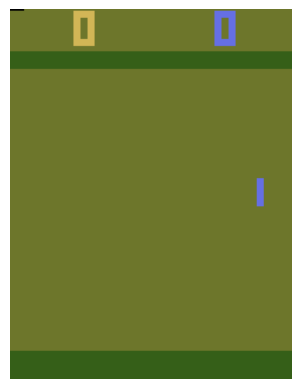

In [23]:
# Display the very first frame we grabbed.
plt.imshow(frames[0])
plt.axis("off")
plt.show()

In [24]:
# will run 5 different games of pong
episodes = 5
for episode in range(1, episodes + 1):
  # resets the env space
    obs, info = env.reset()
    terminated = False
    truncated = False
    score = 0

    # while the instance is not terminated it will run random actions to see its performance
    while not terminated and not truncated:

      # env.render() # Uncomment to see the rendering, idk where it renders
      action = env.action_space.sample()

      # after its random actions and is terminated will return its rewards
      obs, reward, terminated, truncated, info= env.step(action)
      score += reward

      # print out episodes and there scores
    print('Episode:{} Score{}'.format(episode, score))
env.close()

Episode:1 Score-19.0
Episode:2 Score-21.0
Episode:3 Score-21.0
Episode:4 Score-20.0
Episode:5 Score-20.0


In [25]:
# Tensor Flow imports to before we begin to build our model
import numpy as np
from tensorflow.keras.models import Sequential
# we are going to learn from 2D images/picutes of the pong game
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam

In [28]:
# the shape of the screen will define hopw out deep learning model looks like
def build_model(height, width, channels, actions):
    model = Sequential()

    # as we use a image based model we will use convelution to flatten the image, we will train filters to detect where the agients are in the images
    model.add(Conv2D(31, (8,8), strides=(4,4), activation='relu', input_shape=(height, width, channels)))

    model.add(Conv2D(64, (4,4), strides=(2,2), activation='relu'))

    model.add(Conv2D(64, (3,3), activation='relu'))

    # idk yet what dis do
    model.add(Flatten())

    # Dense layers
    model.add(Dense(512, activation='relu'))

    model.add(Dense(256, activation='relu'))

    # compresses based on the number of actions that pong can make
    model.add(Dense(actions, activation='linear'))

    return model

In [29]:
# build the model :)
model = build_model(height, width, channels, num_actions)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 51, 39, 31)     │         5,983 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 18, 64)     │        31,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 22528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,534,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,741,409 (44.79 MB)

 Trainable params: 11,741,409 (44.79 MB)

 Non-trainable params: 0 (0.00 B)